In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R




In [2]:
# Function to read .cam file and extract translation vector and rotation matrix
def read_cam_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Extract translation vector and rotation matrix from the first line
        first_line = list(map(float, lines[0].split()))
        translation_vector = np.array(first_line[:3])
        rotation_matrix = np.array(first_line[3:]).reshape(3, 3)
    return translation_vector, rotation_matrix

# Get all .cam files in the current folder
cam_files = [f for f in os.listdir('.') if f.endswith('.cam')]

# Separate L and R files
l_files = sorted([f for f in cam_files if '_L' in f])
r_files = sorted([f for f in cam_files if '_R' in f])

# Arrays to store rotation vectors
rotation_vectors_L = []
rotation_vectors_R = []

trans_vec_L = []
trans_vec_R = []
rotation_matrix_L=[]
rotation_matrix_R=[]
# Process L files
for l_file in l_files:
    trans_vec, rotation_matrix = read_cam_file(l_file)
    # Convert rotation matrix to rotation vector
    rotation_matrix_L.append(rotation_matrix)
    trans_vec_L.append(trans_vec)
    
    rotation_vector = R.from_matrix(rotation_matrix).as_rotvec()
    rotation_vectors_L.append(rotation_vector)

# Process R files
for r_file in r_files:
    trans_vec, rotation_matrix = read_cam_file(r_file)
    rotation_matrix_R.append(rotation_matrix)
    
    trans_vec_R.append(trans_vec)
    # Convert rotation matrix to rotation vector
    rotation_vector = R.from_matrix(rotation_matrix).as_rotvec()
    rotation_vectors_R.append(rotation_vector)

# Convert to numpy arrays
rotation_vectors_L = np.array(rotation_vectors_L)
rotation_vectors_R = np.array(rotation_vectors_R)

trans_vec_L=np.array(trans_vec_L)
trans_vec_R=np.array(trans_vec_R)

rotation_matrix_L=np.array(rotation_matrix_L)
rotation_matrix_R=np.array(rotation_matrix_R)

In [3]:
base_forward =[0, 0, 1]
base_right =[1, 0, 0]
base_down =[0, 1, 0]

In [4]:
camera_L_T=[]

for i,j in zip(rotation_matrix_L,trans_vec_L):
       camera_L_T.append(np.dot(i.T,-1*j))

camera_L_T=np.array(camera_L_T)



camera_R_T=[]

for i,j in zip(rotation_matrix_R,trans_vec_R):
       camera_R_T.append(np.dot(i.T,-1*j))

camera_R_T=np.array(camera_R_T)


/tmp/ipykernel_41459/1084166380.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


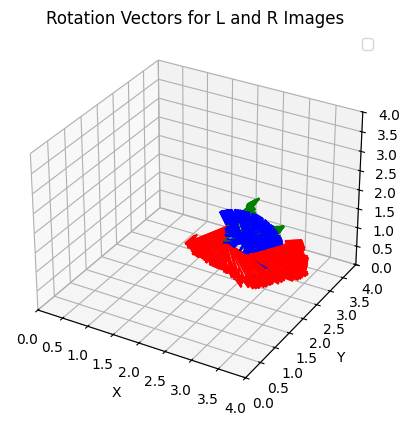

In [18]:
# Plot the rotation vectors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plot(translation,rotation):
# Plot L vectors
    for i,j in zip(translation,rotation):
        
        base_forward_loc = np.dot(j.T,base_forward)
        base_right_loc = np.dot(j.T,base_right)
        base_down_loc  = np.dot(j.T,base_down)
        
        ax.quiver(
            *i,
            *base_forward_loc,
            color='blue', 
        )

        ax.quiver(
            *i,
            *base_right_loc,
            color='red', 
        )


        ax.quiver(
            *i,
            *base_down_loc,
            color='green',
        )

plot(  camera_L_T,rotation_matrix_L)
# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')






scale=5
ax.axes.set_xlim3d(0,4)
ax.axes.set_ylim3d(0,4)
ax.axes.set_zlim3d(0,4 )

ax.legend()
ax.set_title('Rotation Vectors for L and R Images')

# Show the plot
plt.show() 

NameError: name 'm' is not defined

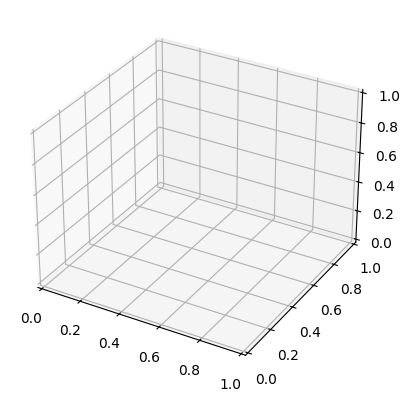

In [6]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# n = 100

# # For each set of style and range settings, plot n random points in the box
# # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

# ax.scatter(camera_L_T[:,0], camera_L_T[:,1],camera_L_T[:,2],marker=m,color='k')
# ax.scatter(camera_R_T[:,0], camera_R_T[:,1],camera_R_T[:,2],marker=m,color='r')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()